# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## Actividad I, Sesion 3

**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from helper import plot_boundary
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
plt.rcParams["figure.figsize"] = (8,6)


In [9]:
# Lea el archivo de datos "election_train.csv" como un marco de datos de Pandas
elect_train = pd.read_csv('county_election_train.csv')

# Read the data file "election_test.csv" as a Pandas dataframe
elect_test = pd.read_csv('county_election_test.csv')

# Eche un vistazo rápido a los datos de entrenamiento 

elect_train.head()


,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,trump,clinton,votergap
0,Alabama,1001,Autauga County,50756,2.842,22.733,51.475,5.2,54366,13.8,21.9,28.6,34.1,91.8,186.5,73.436,23.957,49.479
1,Alabama,1003,Baldwin County,179878,4.550,12.934,51.261,5.5,49626,11.0,28.6,22.3,27.4,114.6,229.4,77.351,19.565,57.786
2,Alabama,1007,Bibb County,21587,2.409,23.930,46.110,6.6,39546,22.1,10.2,33.9,40.3,36.8,230.3,76.966,21.422,55.544
3,Alabama,1009,Blount County,58345,8.954,4.229,50.592,5.4,45567,21.9,12.3,28.0,34.6,88.9,205.3,89.852,8.470,81.382
4,Alabama,1011,Bullock County,10985,7.526,72.831,45.241,7.8,26580,34.5,14.1,31.7,43.0,17.5,211.2,24.229,75.090,-50.862


In [10]:
# Generar una columna llamada won
# won = 1, si Trump ha sido elegido en un determinado condado
# won = 0, si Clinton ha sido elegida en un determinado condado

elect_train['won'] = 1*(elect_train['trump'] > elect_train['clinton'])
elect_test['won'] = 1*(elect_test['trump'] > elect_test['clinton'])
# Establecer las columnas minoritario y profesionales  como predictores de datos de train
X_train = elect_train[['minority', 'bachelor']]
#Establecer las columnas minoritario y profesionales como predictores de datos de test
X_test =  elect_test[['minority', 'bachelor']]

# Establezca la columna "won" como la variable de respuesta de entrenamiento 

y_train = elect_train['won']

# Establezca la columna "won" como la variable de respuesta de testeo 

y_test = elect_test['won']


In [11]:
# Inicialice un clasificador de árbol de decisión con una profundidad de 2
dt1 = DecisionTreeClassifier(max_depth=2)

# Ajustar el clasificador en el train data
dt1.fit(X_train, y_train)

# Inicialice un clasificador de árbol de decisión con una profundidad de 10
dt2 = DecisionTreeClassifier(max_depth=10)

# Ajustar el clasificador en el train data
dt2.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10)

c:\Users\DATABYTES\Documents\Diplomado\FunadmentosMachineLearning\Fundamentos-de-Machine-Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DATABYTES\Documents\Diplomado\FunadmentosMachineLearning\Fundamentos-de-Machine-Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


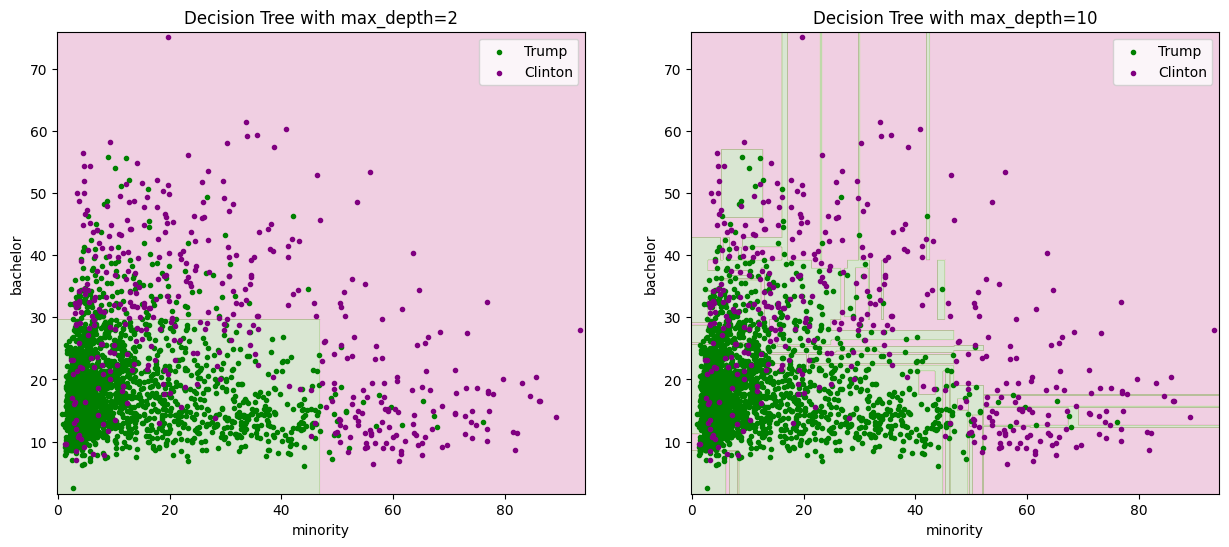

In [12]:
# Llame a la función plot_boundary desde el archivo helper.py
# para obtener los límites de decisión de ambos clasificadores

plot_boundary(elect_train, dt1, dt2)


In [13]:
# # Conjunto de columnas predictoras
pred_cols = ['minority', 'density','hispanic','obesity','female','income','bachelor','inactivity']

# Use las columnas de arriba como las características para
# obtener el conjunto predictor del data train
X_train = elect_train[pred_cols]

# Use las columnas de arriba como las características para
# obtener el conjunto predictor del data test
X_test =  elect_test[pred_cols]

# # Inicialice un clasificador de árbol de decisión con una profundidad de 2
dt1 = DecisionTreeClassifier(max_depth=2)
# Inicialice un clasificador de árbol de decisión con una profundidad de 10
dt2 = DecisionTreeClassifier(max_depth=10)
# Inicialice un clasificador de árbol de decisiones con una profundidad de 15
dt3 = DecisionTreeClassifier(max_depth=15)

# Ajustar todo el clasificador en los datos de entrenamiento 
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [14]:

# Calcule precisión del train y test  para el primer clasificador de árboles de decisión de profundidad 2
dt1_train_acc = dt1.score(X_train, y_train)
dt1_test_acc =  dt1.score(X_test, y_test)

# Calcule precisión del train y test  para el segundo clasificador de árboles de decisión de profundidad 10
dt2_train_acc =  dt2.score(X_train, y_train)
dt2_test_acc =   dt2.score(X_test, y_test)

# Calcule precisión del train y test para el tercer clasificador de árboles de decisión de profundidad 15
dt3_train_acc = dt3.score(X_train, y_train)
dt3_test_acc  = dt3.score(X_test, y_test) 


In [15]:

pt = PrettyTable()
pt.field_names = ['Max Depth', 'Number of Features', 'Train Accuracy', 'Test Accuracy']
pt.add_row([2, len(pred_cols), round(dt1_train_acc, 4), round(dt1_test_acc,4)])
pt.add_row([10, len(pred_cols), round(dt2_train_acc,4), round(dt2_test_acc,4)])
pt.add_row([15, len(pred_cols), round(dt3_train_acc,4), round(dt3_test_acc,4)])
print(pt)


+-----------+--------------------+----------------+---------------+
| Max Depth | Number of Features | Train Accuracy | Test Accuracy |
+-----------+--------------------+----------------+---------------+
|     2     |         8          |     0.8924     |     0.8862    |
|     10    |         8          |     0.9866     |     0.9167    |
|     15    |         8          |     0.9996     |     0.8923    |
+-----------+--------------------+----------------+---------------+


### Actividad 3.1
Cambiar las columnas predictoras a :
- ` 'minority', 'obesity','female','income','bachelor'`

Encontrar la precision para una profundidad de arbol de 10.

In [16]:
## el codigo aca

### Actividad 3.2

### Graficar el train y test accuracy vs Max Depth

- Para las mismas columnas predictoras en el punto 1. Graficar la precision del test y train set para una profundidad variable en el rango de `[2,20]`
- Anotar sus observaciones

In [17]:
# Graficar el train y test accuracy vs Max Depth
